# HealthCare UC Capstone Project

Author: Geeetha Janapareddi
mail: janapaga@mail.uc.edu

### Primary Analysis

##### Importing Libraries

In [7]:
# Import the standard libraries for the data preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image

from copy import deepcopy
import plotly.express as px
from sklearn.preprocessing import LabelEncoder



# Desabilitar warnings
import warnings
warnings.filterwarnings("ignore")

##### Loading DataSet

In [2]:
# Load the dataset
HealthCare_data = pd.read_csv('/Users/rolex/Downloads/Geetha/UCCapstone/HealtheCareData_USA.csv')

In [3]:

HealthCare_data.head(10).style.background_gradient(cmap='YlOrBr')
#display the Head of the Dataset

In [4]:
HealthCare_data.info()  # Summary Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Country             55500 non-null  object 
dtypes: f

In [5]:
# Duplicat values check
duplicate_values=HealthCare_data.duplicated().sum()
print(f'The data set contains the {duplicate_values} values')

The data set contains the 534 values


In [6]:
# Statistical description of the dataset

HealthCare_data.describe().style.background_gradient(cmap='YlOrBr')


In [7]:
HealthCare_data.shape

(55500, 16)

#### Observations
1. The data contains 55500 rows and 16 columns
2. There is 0 nulls and 534 duplicate values in the data; Duplicate values are removed. 
3. In the age column minimum age is 13 and maximum goes to 89
4. the minimum Billing amount is -2008.492140 and maximum billing amount is 52764.276736 on an average billing amount is 25539.316097

### Data Cleaning

In [8]:
#check for NULL values if any in each column
HealthCare_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Country               0
dtype: int64

In [9]:
#check if there are duplicate records in the data
HealthCare_data.duplicated().sum()


534

In [10]:
#removing Duplicate values from the dataset

healthcare= HealthCare_data.drop_duplicates()

healthcare.duplicated().sum()

0

### Exploratory Data Analysis 

In [11]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('---------------------------')

Name
DAvId muNoZ          3
kaTheRIne WeBSTer    2
mICHael aNdERSon     2
DaVID caLhouN        2
MELiSsA COloN        2
                    ..
dUstin blaCKwELl     1
MARc CLaRK           1
sTEphen AyaLa        1
ThOMaS torreS        1
HARoLD ACOSTa        1
Name: count, Length: 49992, dtype: int64
---------------------------
Gender
Male      27496
Female    27470
Name: count, dtype: int64
---------------------------
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
---------------------------
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
---------------------------
Date of Admission
3/16/24     50
10/22/20    49
12/28/21    48
8/10/23     47
7/24/22     47
            ..
5/28/22     14
4/12/23     14
5/23/22     13
7/22/19     13
2/5/22      12
Name: count, Length: 1827, dtype: int6

#### Observations: 

1. After removing Duplicates, Out of total count 54966, Male are 27496 (50.02%) & Female are 27470 (49.97%).
2. The highest boold type that is more requested id A- i.e 6898.
3. The highest Medical Conditions that is more for Arthritis i.e 9218
4. The highest Insurance Provider that is more for Cigna i.e 11139 and least with Aetna i.e 10822
5. The Elective - 18473 (33.603%) Admission type more but the emergency cases are 18102 (32.933%)
6. The more consuming Medication type is Lipitor with 11038
               

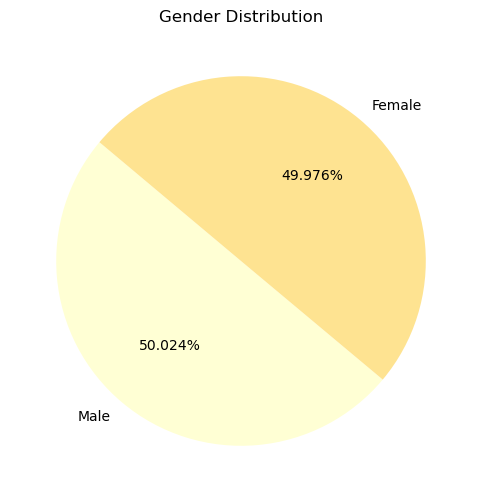

In [12]:
gender_counts = healthcare['Gender'].value_counts()

# Define pleasant and cool colors
cool_colors = [
    '#ffffd4', '#fee391', '#fec44f', '#fe9929', '#d95f0e', '#993404'
]

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.3f%%', 
        startangle=140, 
        colors=cool_colors)  # Use the cool_colors list here
plt.title('Gender Distribution')
plt.show()

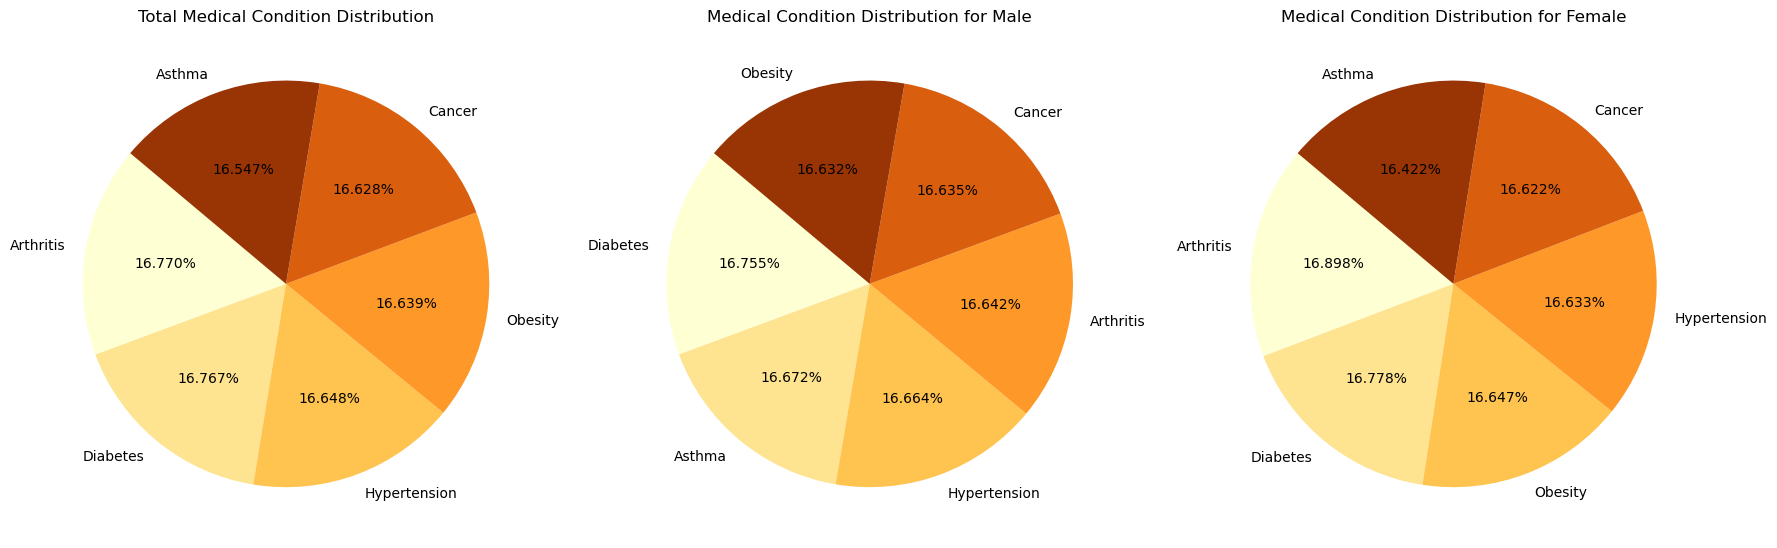

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Medical Condition Distribution
medical_condition_counts = healthcare['Medical Condition'].value_counts()
axes[0].pie(medical_condition_counts, labels=medical_condition_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[0].set_title('Total Medical Condition Distribution')

# Male Medical Condition Distribution
male_medical_condition_counts = healthcare[healthcare['Gender'] == 'Male']['Medical Condition'].value_counts()
axes[1].pie(male_medical_condition_counts, labels=male_medical_condition_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[1].set_title('Medical Condition Distribution for Male')

# Female Medical Condition Distribution
female_medical_condition_counts = healthcare[healthcare['Gender'] == 'Female']['Medical Condition'].value_counts()
axes[2].pie(female_medical_condition_counts, labels=female_medical_condition_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[2].set_title('Medical Condition Distribution for Female')

plt.tight_layout()
plt.show()


Gives the Details od Medical Condition Distribution among MAle and Female in which Diabetes is more and Obesity is less in male, similary Arthritis is more and Asthma pacients are less in Females.

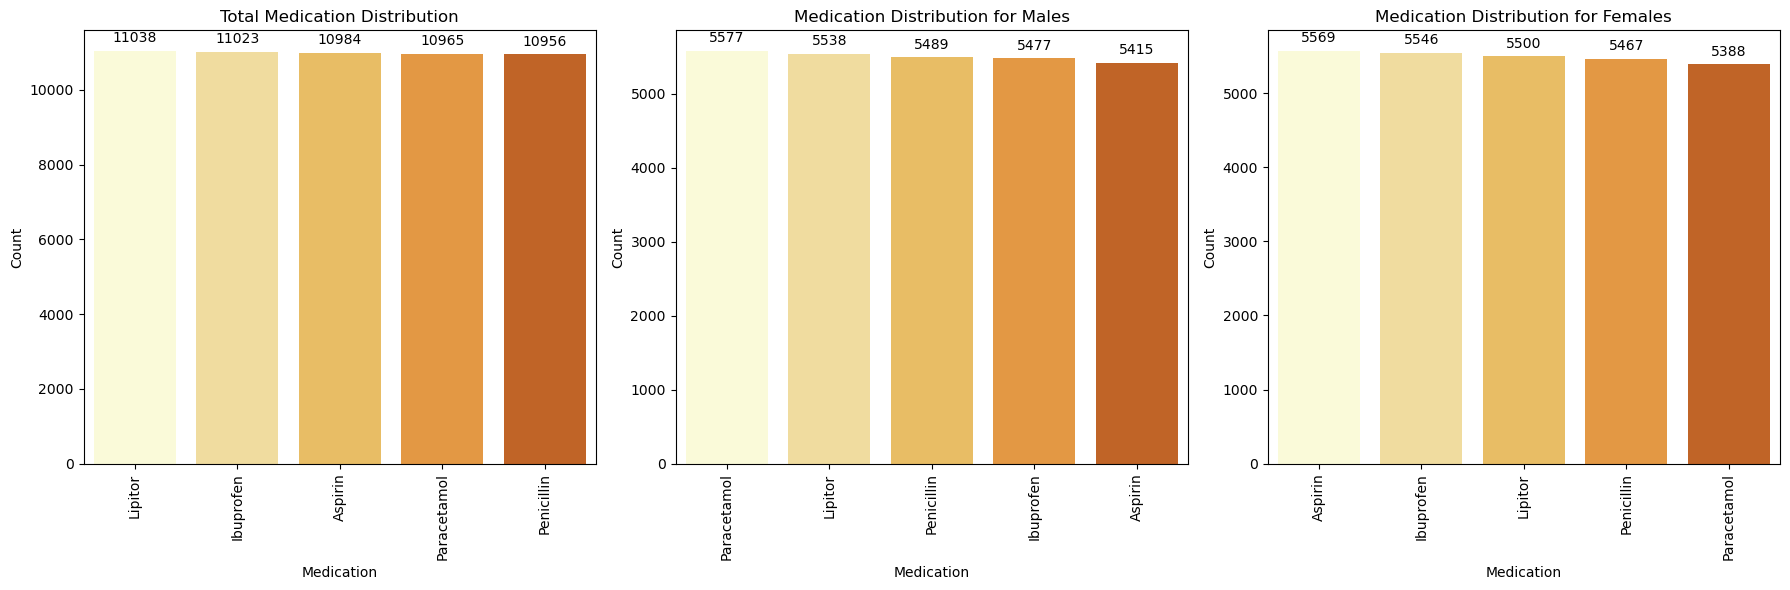

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Medication Distribution
total_medication_counts = healthcare['Medication'].value_counts()
sns.barplot(x=total_medication_counts.index, y=total_medication_counts.values, ax=axes[0], palette=cool_colors)
axes[0].set_title('Total Medication Distribution')
axes[0].set_xlabel('Medication')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Adding count values on top of the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Medication Distribution for Males
male_medication_counts = healthcare[healthcare['Gender'] == 'Male']['Medication'].value_counts()
sns.barplot(x=male_medication_counts.index, y=male_medication_counts.values, ax=axes[1], palette=cool_colors)
axes[1].set_title('Medication Distribution for Males')
axes[1].set_xlabel('Medication')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adding count values on top of the bars
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Medication Distribution for Females
female_medication_counts = healthcare[healthcare['Gender'] == 'Female']['Medication'].value_counts()
sns.barplot(x=female_medication_counts.index, y=female_medication_counts.values, ax=axes[2], palette=cool_colors)
axes[2].set_title('Medication Distribution for Females')
axes[2].set_xlabel('Medication')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adding count values on top of the bars
for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

1. On total the Lipitor medication useage with count of 11038 and penicillin is less useage with count of 10956.
2. In Male the Paracetamol useage with count of 5577 and Aspirin is less useage with count of 5415.
3. In Female the Aspirin useage with count of 5569 and Paracetamol is less useage with count of 5388.

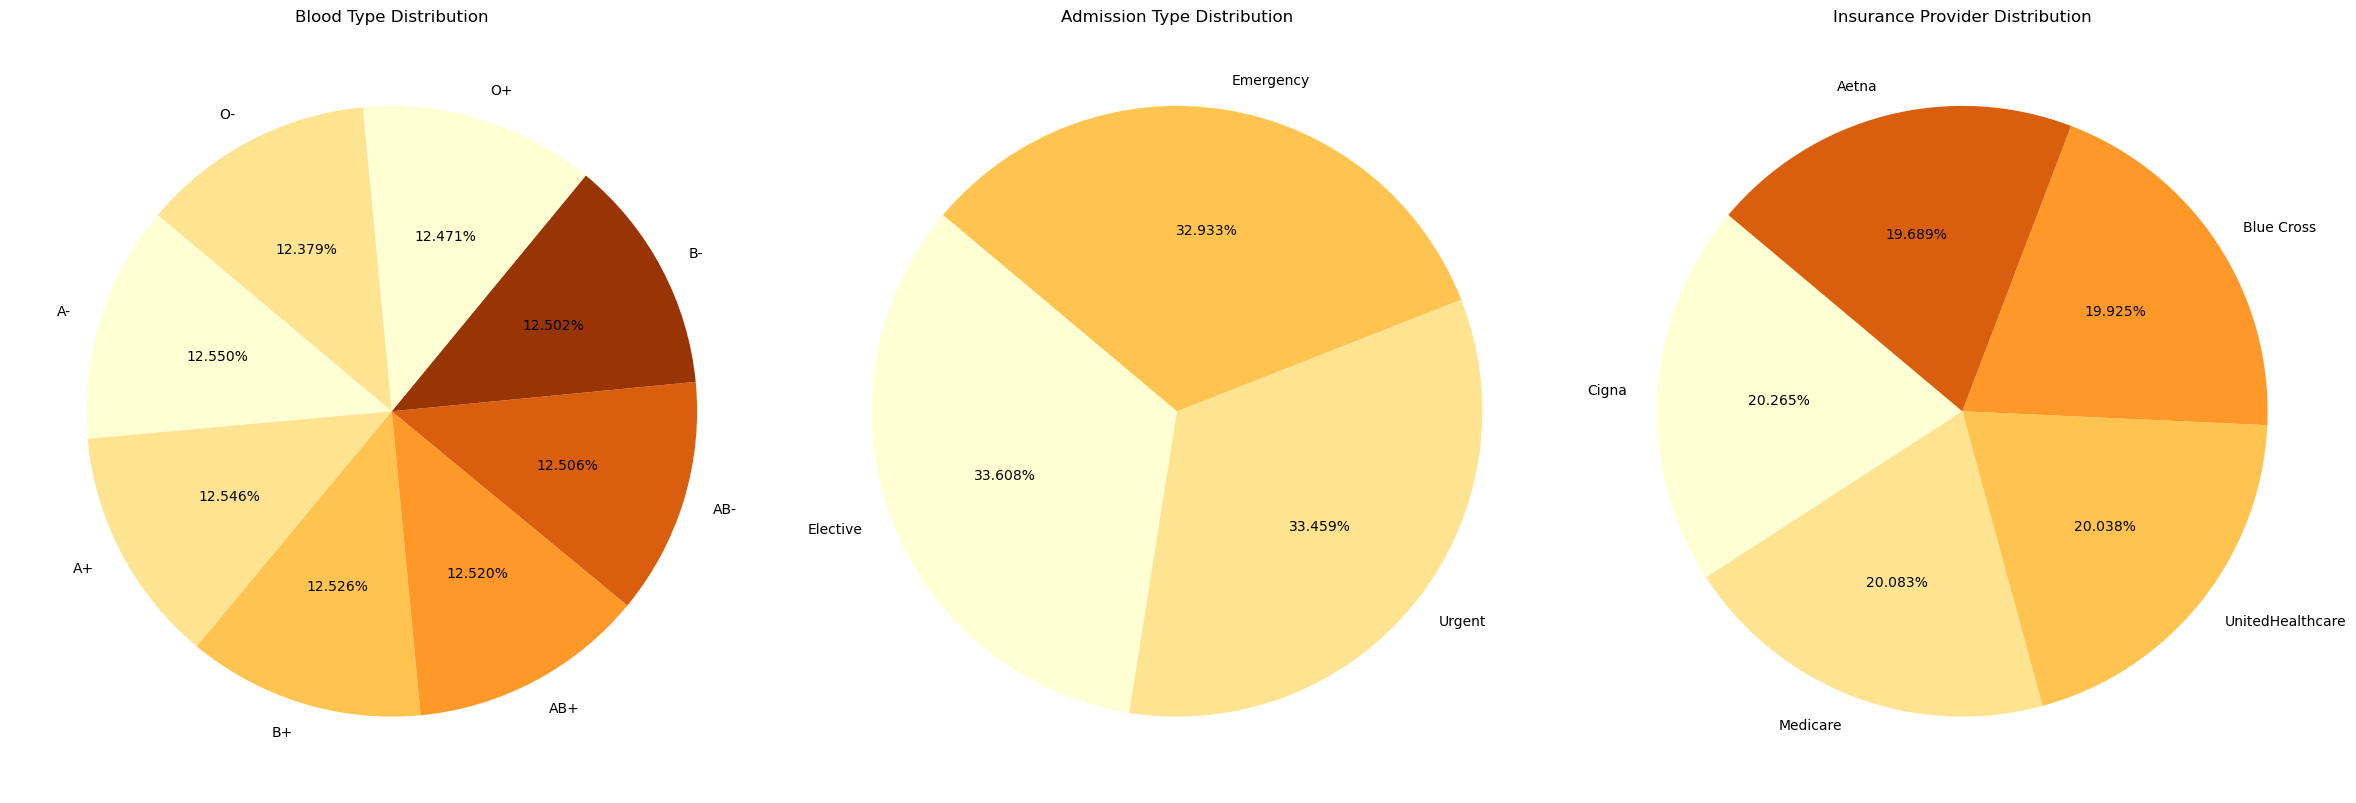

In [15]:
# Create subplots for distributions
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Blood Type Distribution
blood_type_counts = healthcare['Blood Type'].value_counts()
axes[0].pie(blood_type_counts, labels=blood_type_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[0].set_title('Blood Type Distribution')

# Admission Type Distribution
admission_type_counts = healthcare['Admission Type'].value_counts()
axes[1].pie(admission_type_counts, labels=admission_type_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[1].set_title('Admission Type Distribution')

# Insurance Provider Distribution
insurance_provider_counts = healthcare['Insurance Provider'].value_counts()
axes[2].pie(insurance_provider_counts, labels=insurance_provider_counts.index, 
            autopct='%1.3f%%', startangle=140, colors=cool_colors)
axes[2].set_title('Insurance Provider Distribution')

plt.tight_layout()
plt.show()

In [16]:
healthcare.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='YlOrBr')

In [17]:
healthcare.groupby('Medical Condition')['Admission Type'].value_counts()\
.unstack().style.background_gradient(cmap='YlOrBr')


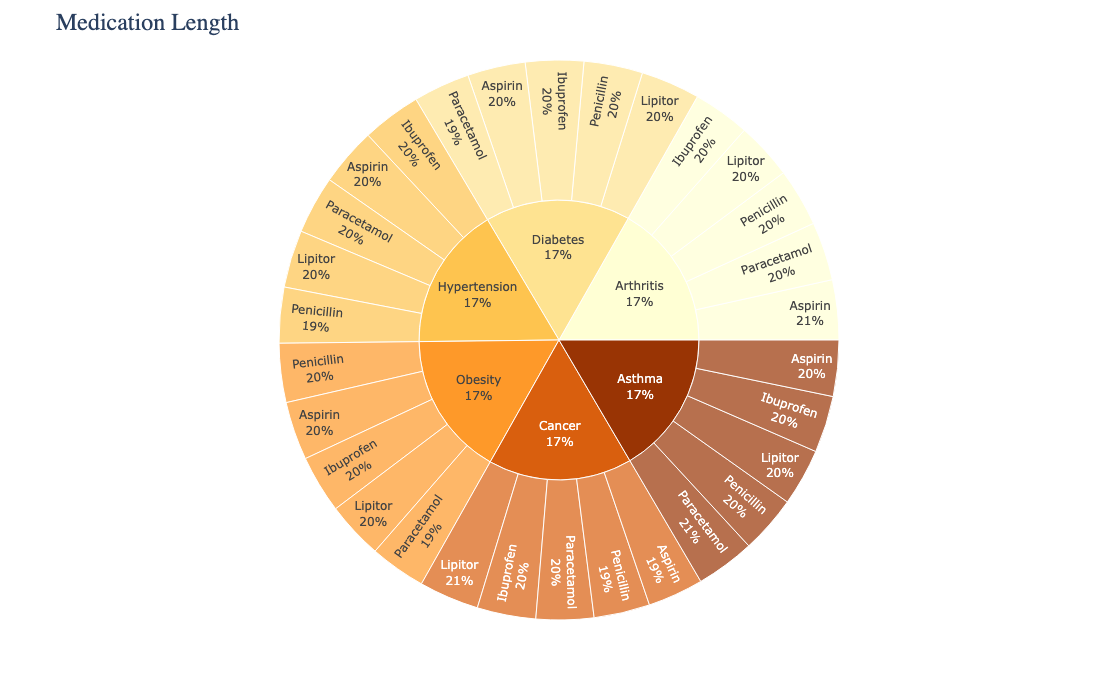

In [18]:
# Create the Sunburst chart with the converted cool colors

fig = px.sunburst(healthcare, path=['Medical Condition', 'Medication'], color_discrete_sequence=cool_colors)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(
    title_text="Medication Length", 
    titlefont={'size': 24, 'family': 'Serif'}, 
    width=700, 
    height=700
)
fig.show()

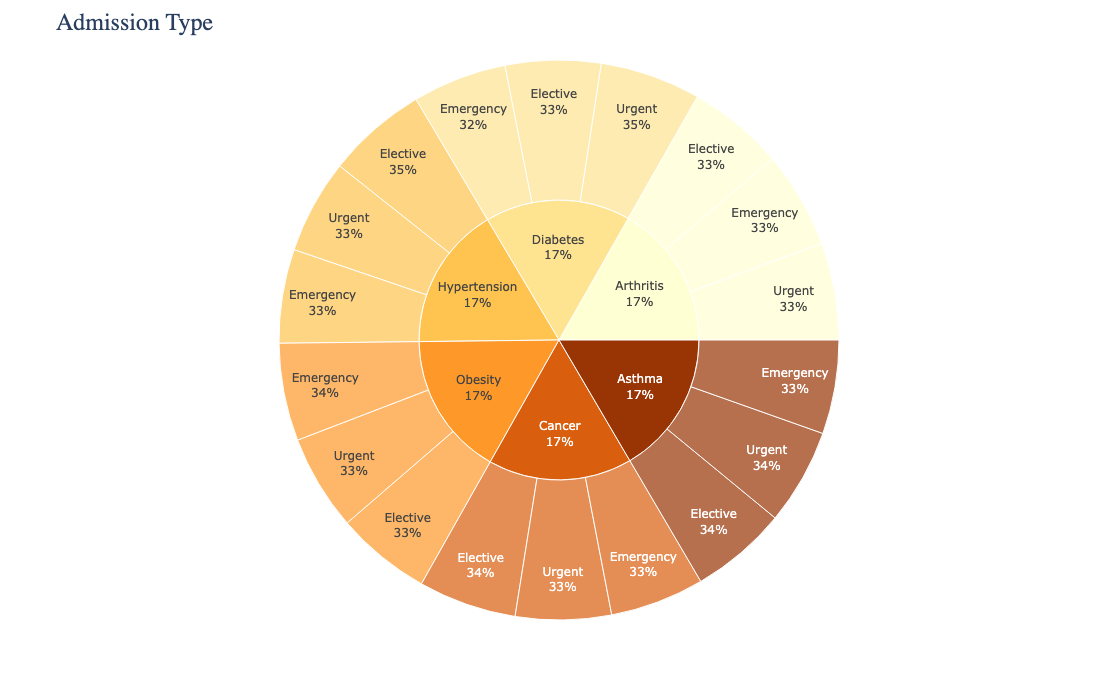

In [19]:
fig = px.sunburst(healthcare, path=['Medical Condition', 'Admission Type'], color_discrete_sequence=cool_colors)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Admission Type", titlefont={'size': 24, 'family':'Serif'}, width=700, height=700)
fig.show()

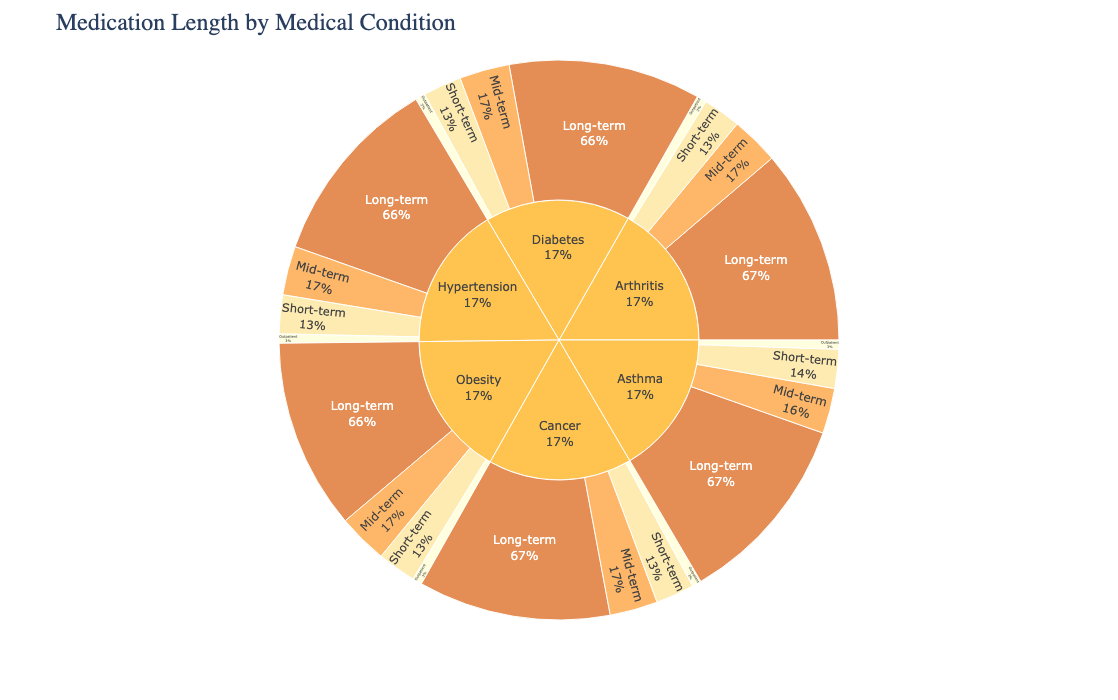

In [20]:
# Ensure date columns are in datetime format
healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'])
healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'])

# Calculate Duration
healthcare['Duration'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Duration'] = healthcare['Duration'].astype(int)

# Define the Medication Length based on Duration
conditions = [
    (healthcare['Duration'] > 10),
    (healthcare['Duration'] > 5) & (healthcare['Duration'] <= 10),
    (healthcare['Duration'] > 1) & (healthcare['Duration'] <= 5),
    (healthcare['Duration'] <= 1)
]
choices = ['Long-term', 'Mid-term', 'Short-term', 'Outpatient']
healthcare['Medication Length'] = np.select(conditions, choices, default='Outpatient')

# Create the sunburst plot
fig = px.sunburst(healthcare, path=['Medical Condition', 'Medication Length'], 
                  color='Medication Length', color_discrete_sequence=cool_colors)
fig.update_traces(textinfo="label + percent parent")
fig.update_layout(title_text="Medication Length by Medical Condition", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=700, 
                  height=700)
fig.show()

#### Billing Amount Distribution

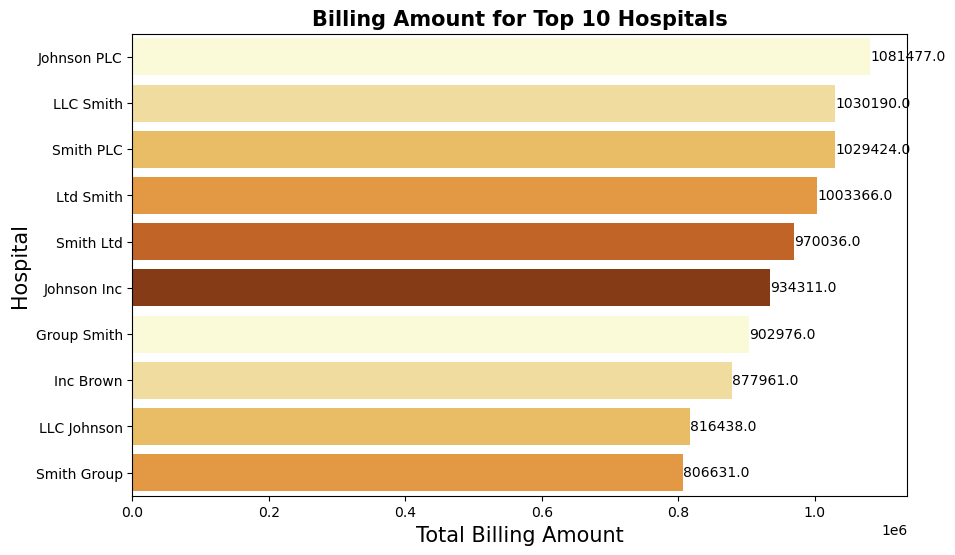

In [21]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()

# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette=cool_colors)
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

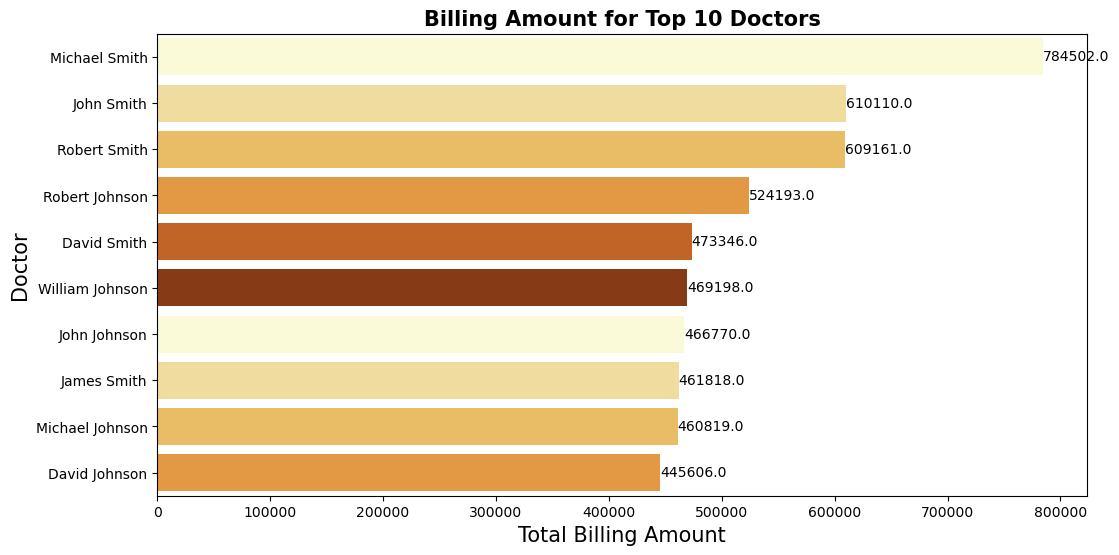

In [22]:
# Grouping data by doctors and calculating the sum of billing amount
top10_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top10_doctors_billing['Billing Amount'],
            y= top10_doctors_billing['Doctor'],
            palette=cool_colors)
for index,value in enumerate(top10_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Doctors',fontsize = 15, weight = 'bold')
plt.show()

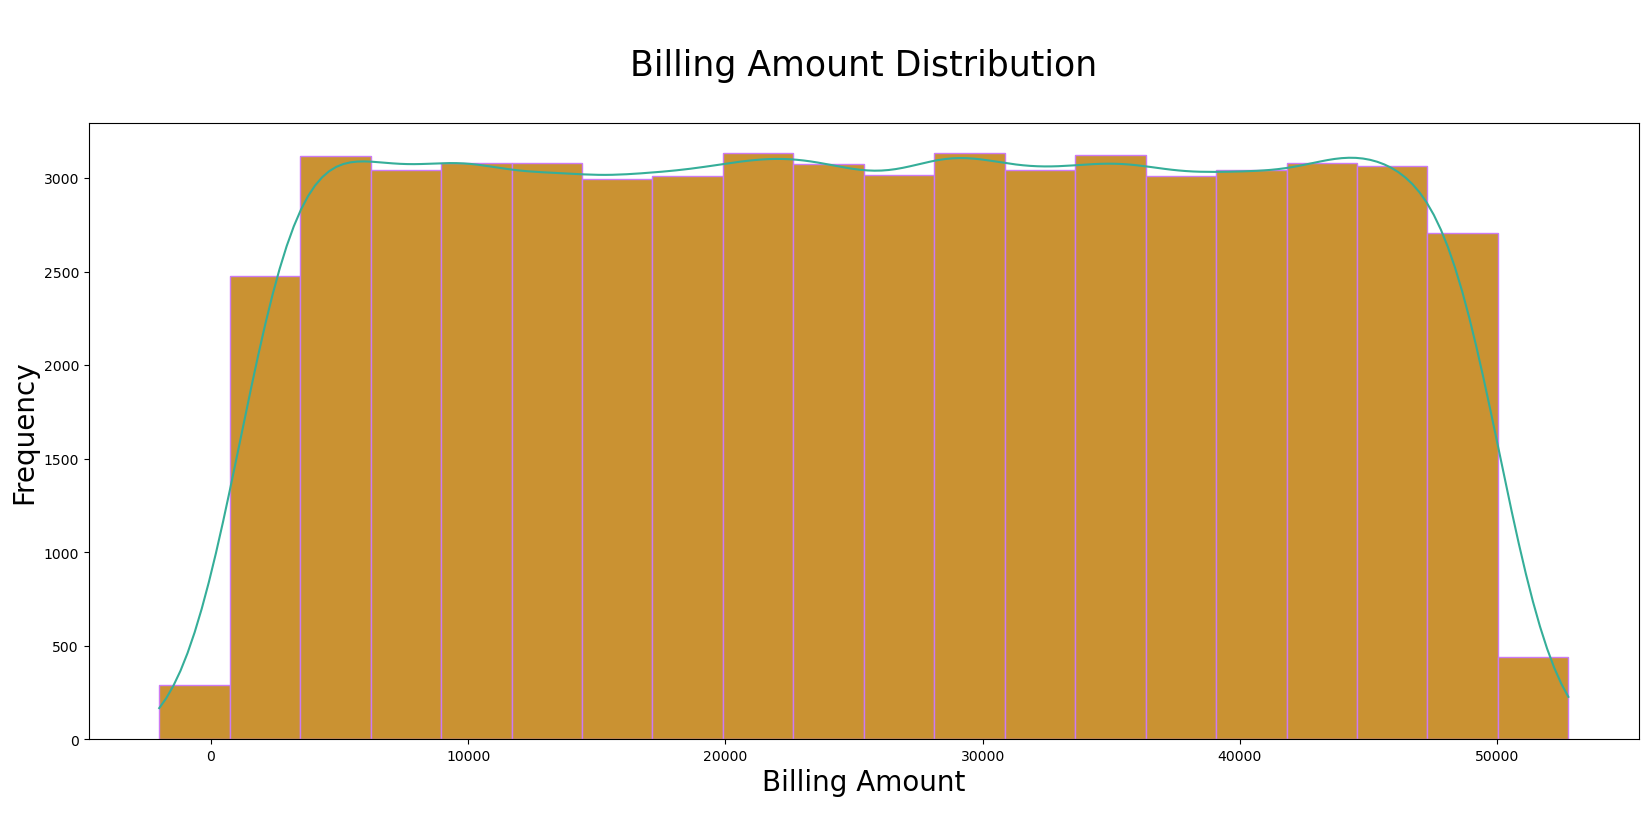

In [23]:
healthcare1 = healthcare.sort_values(["Billing Amount"], ascending=False)
palette = sns.color_palette("husl", 15)

_, axs = plt.subplots(figsize=(20, 8))
sns.histplot(healthcare1["Billing Amount"], color=palette[2], kde=True, bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs.lines[0].set_color(palette[7])
axs.set_title("\nBilling Amount Distribution\n", fontsize=25)
axs.set_xlabel("Billing Amount\n", fontsize=20)
axs.set_ylabel("Frequency", fontsize=20)
plt.show()

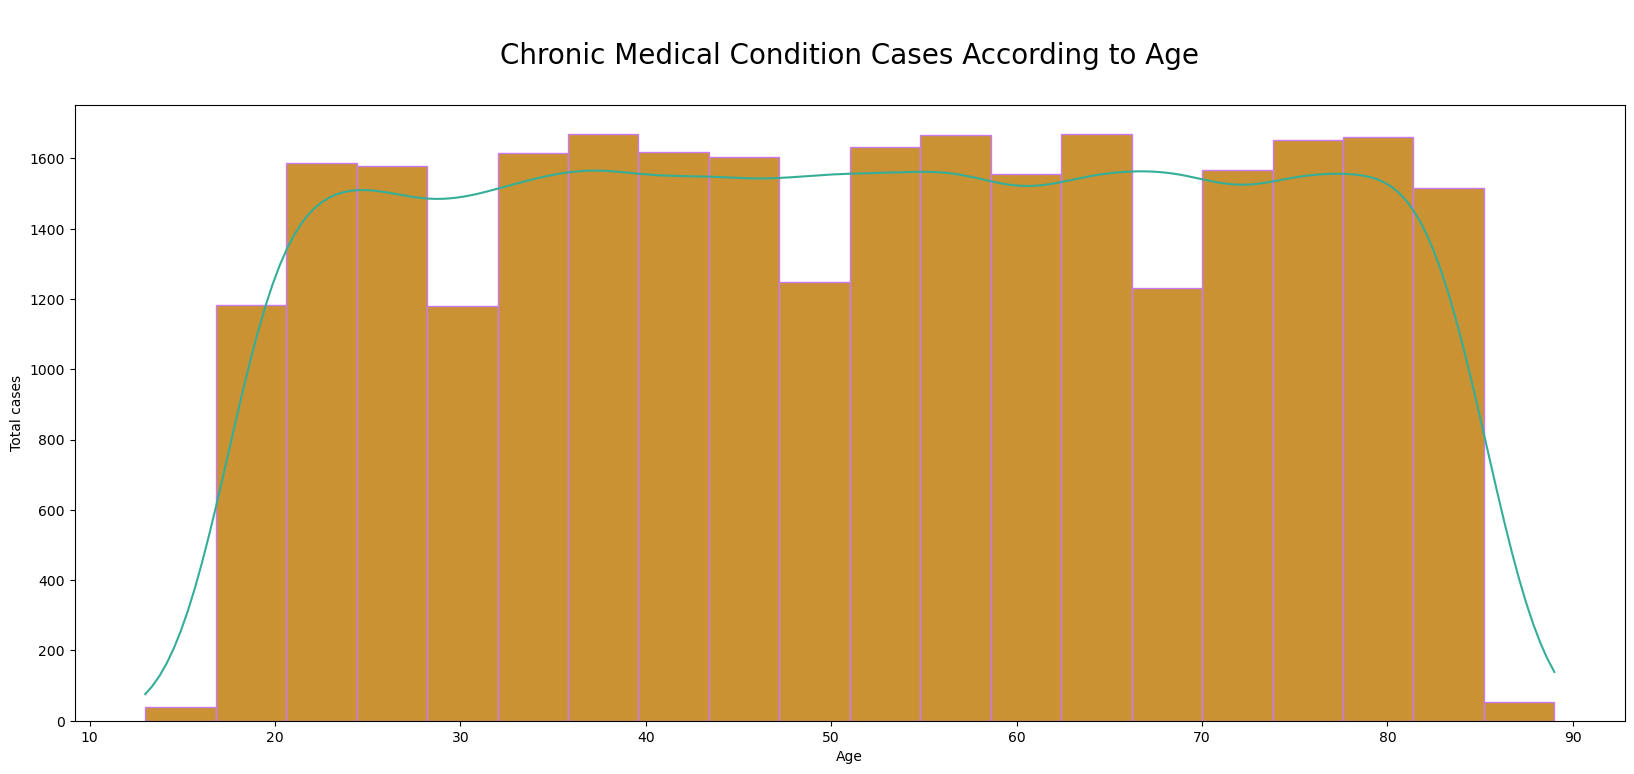

In [25]:
chronical_conditions = ["Asthma", "Diabetes", "Arthritis"]
chronical = healthcare["Medical Condition"].isin(chronical_conditions)

_, axs = plt.subplots(figsize=(20, 8))
sns.histplot(healthcare[chronical]["Age"], color=palette[2], kde=True, bins=20, alpha=1, fill=True, edgecolor=palette[12])
axs.lines[0].set_color(palette[7])
axs.set_title("\nChronic Medical Condition Cases According to Age\n", fontsize=20)
axs.set_xlabel("Age")
axs.set_ylabel("Total cases")
plt.show()

In [37]:
# Convert date columns to datetime format if they exist
if 'Date of Admission' in healthcare.columns:
    healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'], errors='coerce')
if 'Discharge Date' in healthcare.columns:
    healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'], errors='coerce')

# Calculate 'Duration' in days if relevant
if 'Date of Admission' in healthcare.columns and 'Discharge Date' in healthcare.columns:
    healthcare['Duration'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days

# Handle missing values (e.g., fill with mean or mode)
healthcare.fillna(healthcare.mean(), inplace=True)

# Encode categorical columns
lc = LabelEncoder()
for col in healthcare.columns:
    if healthcare[col].dtype == 'object':
        healthcare[col] = lc.fit_transform(healthcare[col])

# Ensure all columns are numeric
for col in healthcare.columns:
    healthcare[col] = pd.to_numeric(healthcare[col], errors='coerce')

# Verify data types again to ensure all columns are numeric
print(healthcare.dtypes)

Name                    int64
Age                     int64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Date of Admission       int64
Doctor                  int64
Hospital                int64
Insurance Provider      int64
Billing Amount        float64
Room Number             int64
Admission Type          int64
Discharge Date          int64
Medication              int64
Test Results            int64
Country                 int64
Duration                int64
Medication Length       int64
dtype: object


In [45]:
# List of columns to include in correlation matrix
correlation_columns = [
    'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
    'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
    'Admission Type', 'Discharge Date', 'Medication', 'Test Results', 'Medication Length'
]

# Select the relevant columns for correlation
correlate_df = healthcare[correlation_columns]

# Create correlation matrix
correlation_matrix = correlate_df.corr()

# Verify the correlation matrix
print(correlation_matrix)


                         Age    Gender  Blood Type  Medical Condition  \
Age                 1.000000 -0.002510   -0.000031          -0.002800   
Gender             -0.002510  1.000000   -0.000690           0.000746   
Blood Type         -0.000031 -0.000690    1.000000          -0.004183   
Medical Condition  -0.002800  0.000746   -0.004183           1.000000   
Date of Admission  -0.000877  0.001649   -0.000147          -0.001739   
Doctor             -0.003225 -0.002916   -0.004764          -0.002240   
Hospital            0.001728  0.003262   -0.000457          -0.002048   
Insurance Provider -0.005222 -0.003267   -0.001097          -0.004689   
Billing Amount     -0.003427  0.004939   -0.000575           0.005426   
Room Number        -0.000352 -0.006764    0.004465          -0.004286   
Admission Type      0.004098  0.009642   -0.004305          -0.001848   
Discharge Date     -0.000748  0.001718   -0.000175          -0.001838   
Medication         -0.006073  0.007855    0.002778 

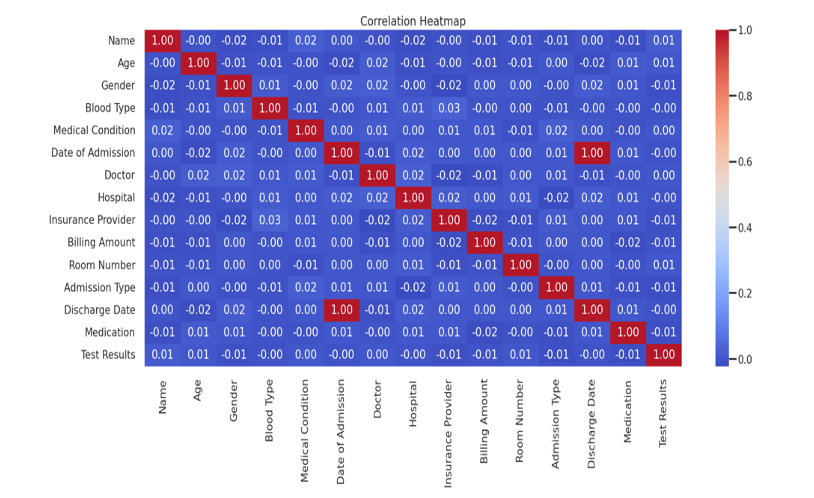

In [26]:
# Replace NaN values in correlation matrix with 0 (or any other method as per your need)
correlation_matrix = correlation_matrix.fillna(0)

# Create the correlation heatmap with detailed annotations
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", cbar=True, annot_kws={"size": 10}, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


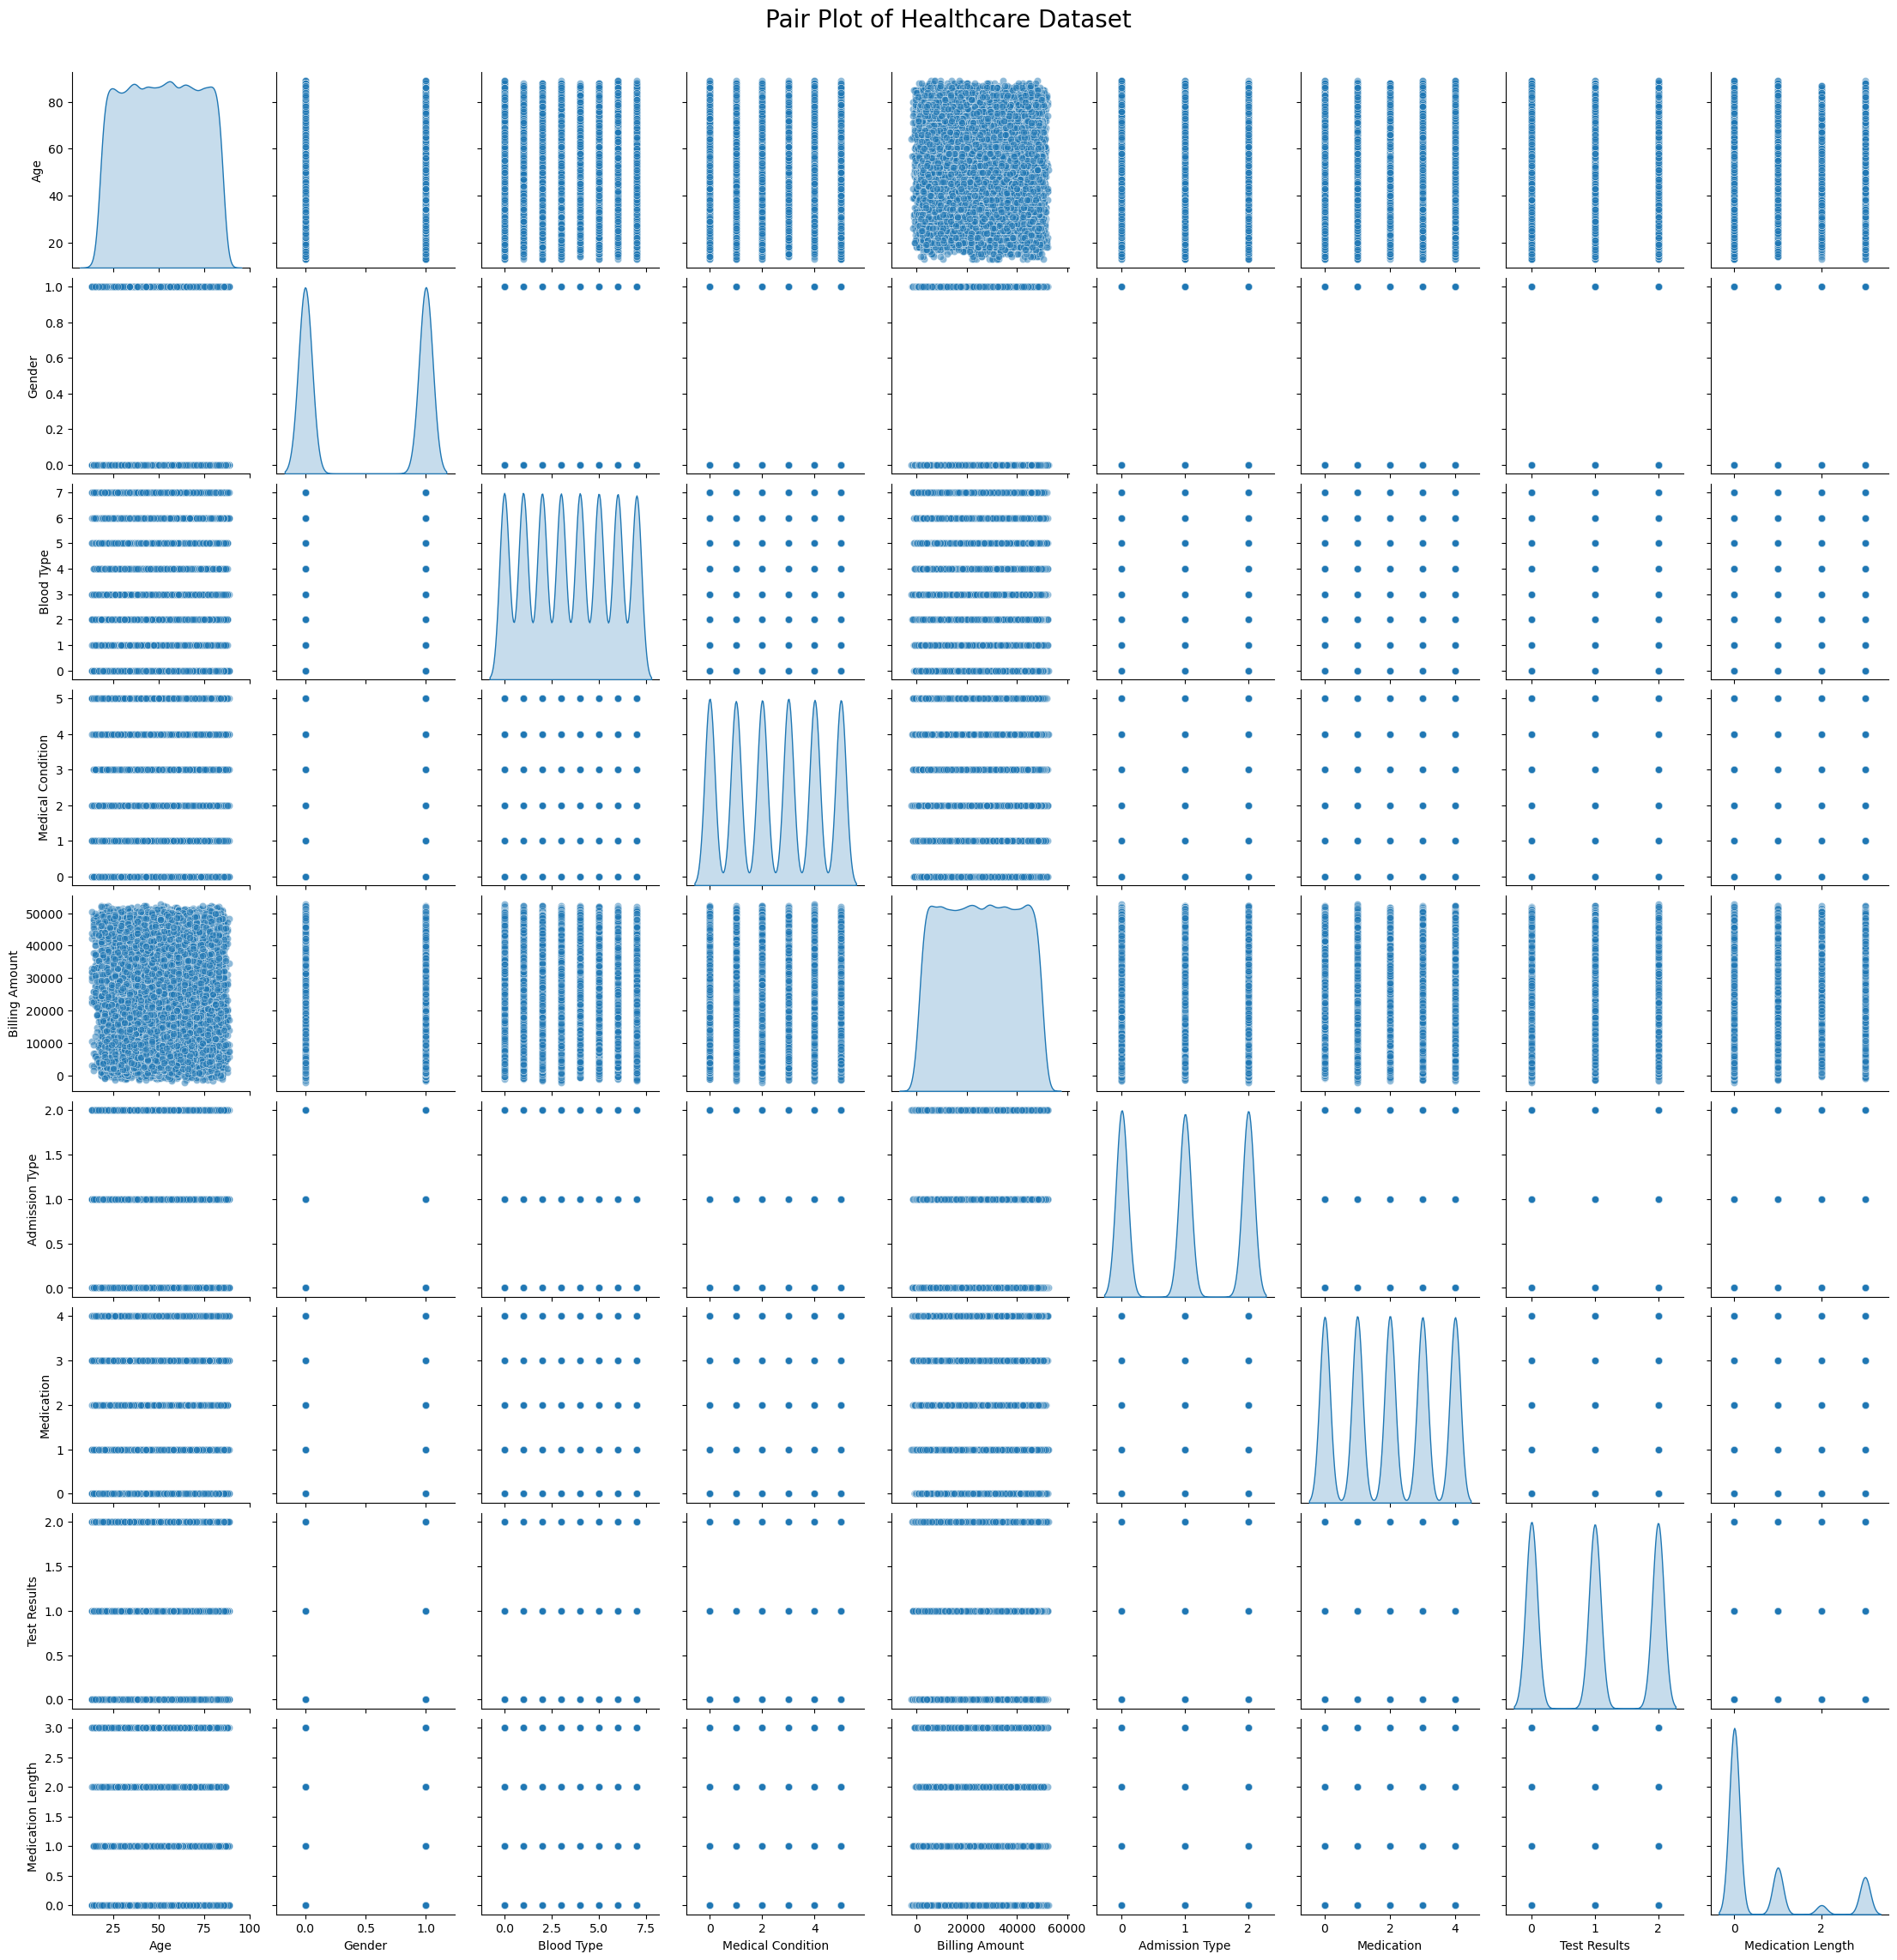

In [58]:
# Convert date columns to datetime format if they exist
if 'Date of Admission' in healthcare.columns:
    healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'], errors='coerce')
if 'Discharge Date' in healthcare.columns:
    healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'], errors='coerce')

# Calculate 'Duration' in days if relevant
if 'Date of Admission' in healthcare.columns and 'Discharge Date' in healthcare.columns:
    healthcare['Duration'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days

# Handle missing values (e.g., fill with mean or mode)
healthcare.fillna(healthcare.mean(), inplace=True)

# Encode categorical columns
lc = LabelEncoder()
for col in healthcare.columns:
    if healthcare[col].dtype == 'object':
        healthcare[col] = lc.fit_transform(healthcare[col])

# Ensure all columns are numeric
for col in healthcare.columns:
    healthcare[col] = pd.to_numeric(healthcare[col], errors='coerce')

# List of columns to include in the pair plot
pairplot_columns = [
    'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount',
    'Admission Type', 'Medication', 'Test Results', 'Medication Length'
]

# Select the relevant columns for the pair plot
pairplot_df = healthcare[pairplot_columns]

# Create the pair plot
sns.pairplot(pairplot_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Healthcare Dataset', y=1.02, fontsize=20)
plt.show()
# Save the pair plot as an image
#pairplot_path = '/Users/rolex/Downloads/Geetha/UCCapstone/pair_plot.png'  # Update with your desired save path
#plt.savefig(pairplot_path)
#plt.close()